In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [131]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [132]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [133]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [134]:
df.duplicated().sum()

1

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [137]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [138]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

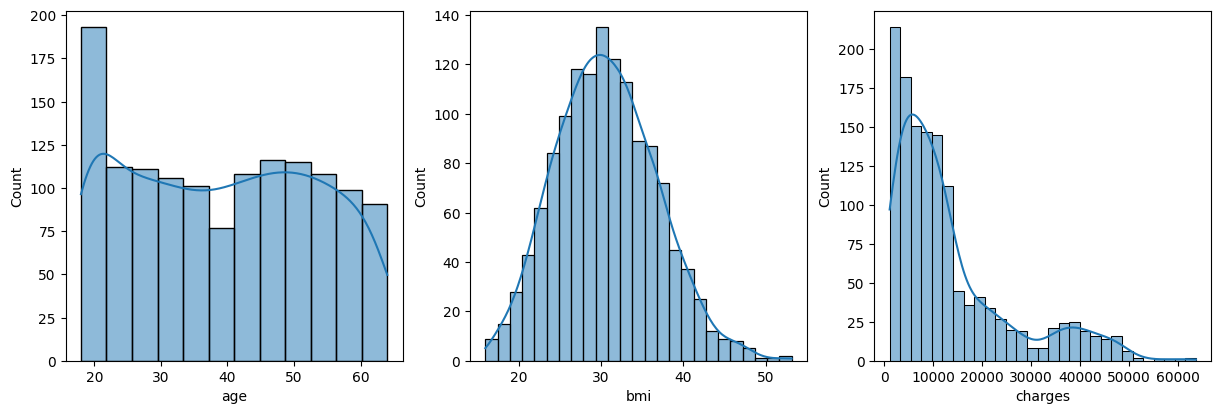

In [139]:
columns = ['age', 'bmi', 'charges']
fig = plt.figure(figsize=(20,10))
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=col, kde=True)


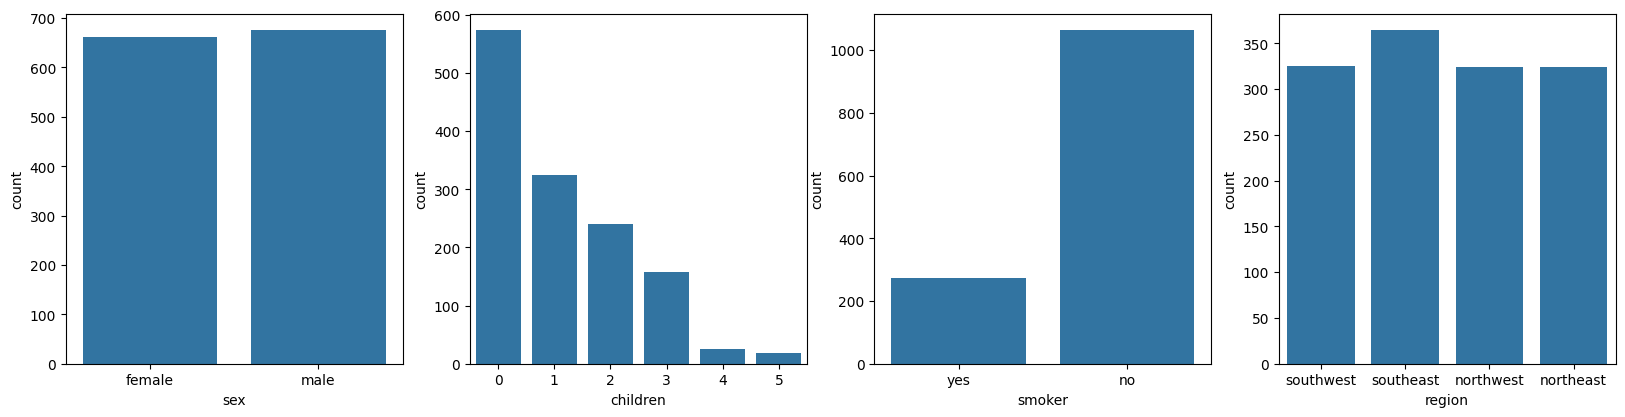

In [140]:
columns = ['sex', 'children', 'smoker', 'region']
fig = plt.figure(figsize=(20,10))
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=col)


In [141]:
sex_encoder = OneHotEncoder(sparse_output=False)

sex_encoded = sex_encoder.fit_transform(df[['sex']])
sex_df = pd.DataFrame(sex_encoded, columns=sex_encoder.get_feature_names_out(sex_encoder.feature_names_in_))
sex_df.rename(columns={
    'sex_female': 'female',
    'sex_male': 'male'
}, inplace=True)
sex_df

,female,male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1332,0.0,1.0
1333,1.0,0.0
1334,1.0,0.0
1335,1.0,0.0


In [142]:
smoker_encoder = OneHotEncoder(sparse_output=False)

smoker_encoded = smoker_encoder.fit_transform(df[['smoker']])
smoker_df = pd.DataFrame(smoker_encoded, columns=smoker_encoder.get_feature_names_out(smoker_encoder.feature_names_in_))
smoker_df

,smoker_no,smoker_yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1332,1.0,0.0
1333,1.0,0.0
1334,1.0,0.0
1335,1.0,0.0


In [143]:
region_encoder = OneHotEncoder(sparse_output=False)

region_encoded = region_encoder.fit_transform(df[['region']])
region_df = pd.DataFrame(region_encoded, columns=region_encoder.get_feature_names_out(region_encoder.feature_names_in_))
region_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1332,0.0,1.0,0.0,0.0
1333,1.0,0.0,0.0,0.0
1334,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,1.0


In [ ]:
df = pd.concat([df.drop(['sex', 'smoker', 'region'], axis=1), sex_df, region_df, smoker_df], axis=1)

,age,bmi,children,charges,female,male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1337,61.0,29.070,0.0,29141.36030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df.dropna(inplace=True)

In [148]:
charges = df[['charges']]

df = pd.concat([df.drop(['charges'], axis=1), charges], axis=1)

In [150]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.index

Index([1113,  967,  599,  170,  275, 1140,  209,  342,  140,  926,
       ...
        330, 1239,  466,  121, 1045, 1096, 1131, 1295,  861, 1127],
      dtype='int64', length=1068)

In [153]:
X_test.index

Index([ 899, 1063, 1255,  298,  237,  481,  240,  277,  415,  706,
       ...
         54,  924,  740,  109,  639,  534,  542,  896, 1093, 1284],
      dtype='int64', length=268)

In [154]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [155]:
y_pred = linear.predict(X_test)

In [156]:
print(linear.intercept_)

-3550.3299567852882


In [157]:
print(linear.coef_)

[  248.5329455    287.69346411   588.00837038  -535.06220552
   535.06220552   588.28285601   399.27577353  -830.97417124
  -156.58445829 -4627.83682329  4627.83682329]


In [158]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.2398063876169968
mean_absolute_error: 8473.225838434078
mean_absolute_percentage_error: 0.8690992379647178
root_mean_squared_error: 11623.420684269717
